# Session 13 - SVM

![](https://datatron.com/wp-content/uploads/2021/05/Support-Vector-Machine.png)

SVM (Support Vector Machine) adalah sebuah algoritma pembelajaran mesin yang digunakan untuk tugas klasifikasi dan regresi. Ini adalah salah satu algoritma yang populer dan kuat dalam pembelajaran mesin yang bekerja dengan membangun hyperplane (bidang pembagian) dalam ruang berdimensi tinggi untuk memisahkan data ke dalam kelas-kelas yang berbeda. Konsep utama dalam SVM adalah sebagai berikut:

1. **Hyperplane**: Dalam konteks SVM, hyperplane adalah bidang atau dinding pemisah yang digunakan untuk memisahkan dua kelas data. Hyperplane ini memiliki dimensi satu kurang dari dimensi data itu sendiri karena harus menjadi bidang pemisah.

2. **Margin**: Margin adalah jarak antara hyperplane dan titik data terdekat dari masing-masing kelas. SVM berusaha untuk memaksimalkan margin ini karena semakin besar margin, semakin baik kemampuan model untuk menggeneralisasi pada data yang belum pernah dilihat sebelumnya.

3. **Support Vectors**: Support vectors adalah titik-titik data yang berada pada margin, yang berarti mereka adalah titik-titik yang paling dekat dengan hyperplane. Support vectors sangat penting dalam SVM karena mereka mempengaruhi penentuan hyperplane dan model secara keseluruhan.

4. **Kernel Trick**: SVM juga memungkinkan penggunaan kernel function untuk memproyeksikan data ke ruang berdimensi lebih tinggi. Hal ini memungkinkan SVM untuk menangani masalah yang tidak dapat dipisahkan secara linier dalam dimensi asli. Kernel seperti RBF (Radial Basis Function) dan Polynomial sering digunakan dalam SVM.

5. **Regularisasi**: SVM memiliki parameter penalti yang mengontrol tingkat kompleksitas model. Dalam SVM, ini disebut dengan parameter `C`. Nilai yang lebih tinggi dari `C` menghasilkan margin yang lebih ketat dan memungkinkan beberapa titik data berada di dalam margin atau bahkan di sisi yang salah dari hyperplane, sementara nilai yang lebih rendah dari `C` menghasilkan margin yang lebih besar dan lebih banyak titik data berada di dalamnya.

6. **Klasifikasi**: Dalam tugas klasifikasi, SVM mencoba memisahkan dua kelas data dengan hyperplane. Titik-titik data yang berada di satu sisi hyperplane diklasifikasikan ke dalam satu kelas, sementara titik-titik data di sisi lain diklasifikasikan ke dalam kelas yang lain.

7. **Regresi**: Selain tugas klasifikasi, SVM juga dapat digunakan untuk regresi dengan memodifikasi formulasi matematisnya. Dalam hal ini, SVM mencoba membangun hyperplane yang mencocokkan data target secara sebaik mungkin.

![](https://miro.medium.com/v2/resize:fit:1100/1*XE9jt0r1yAW8LnliQ3mllQ.png)




## 1. Load Dataset "Chiller.xlsx"

**ChatGPT Prompt:**

Berikan saya code python untuk menghubungkan google colab dengan google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**ChatGPT Prompt:**

Berikan code untuk load dataset "Chiller.xlsx' pada folder Dataset di google drive

In [2]:
# Mengimpor library pandas
import pandas as pd

# Menentukan path file Excel
file_path = '/content/drive/MyDrive/Dataset/Chiller.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama dari dataframe
df.head()

Evap LWT  Evap EWT  Unit Capacity  Evap Sat Temperature  \
0       5.8       9.7           44.0                   1.6   
1       5.8       9.8           46.0                   1.4   
2       5.8       9.8           46.0                   2.3   
3       6.1      10.4           46.0                   2.3   
4       5.8       9.9           48.0                   2.0   

   Cond Sat Temperature  Suction Temperature  Discharge Temperature  \
0                  44.9                  6.6                   63.6   
1                  44.9                  6.6                   63.9   
2                  44.2                  7.6                   62.5   
3                  40.4                  6.8                   60.6   
4                  39.8                  7.0                   59.3   

   Oil Pressure  Run Hour Kompressor  Ampere Kompressor  No, Of Start  \
0        1007.2                17924              133.6          1336   
1        1007.2                17926              134.5          1336   
2         976.4                17927              132.7          1336   
3         844.0                17930              120.4          1336   
4         968.5                17931              118.5          1336   

   Tekanan Return Chiller  Tekanan Supply Chiller  Inlet Softwater  \
0                     5.0                     4.6              3.0   
1                     5.0                     4.6              3.0   
2                     5.0                     4.6              3.0   
3                     5.0                     4.6              3.0   
4                     5.0                     4.6              3.0   

   Tekanan Sebelum Pompa  Tekanan Sesudah Pompa  Ampere R-S  Ampere S-T  
0                    4.6                    6.4       143.0       146.2  
1                    4.6                    6.4       121.0       116.2  
2                    4.6                    6.4       134.2       133.5  
3                    4.6                    6.4       134.2       133.5  
4                    4.6                    6.4       134.2       133.5

## 2. EDA (Exploratory Data Analysis)

**ChatGPT Prompt:**

Berikan code untuk melakukan EDA pada dataset tersebut

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Evap LWT                1219 non-null   float64
 1   Evap EWT                1219 non-null   float64
 2   Unit Capacity           1219 non-null   float64
 3   Evap Sat Temperature    1219 non-null   float64
 4   Cond Sat Temperature    1219 non-null   float64
 5   Suction Temperature     1219 non-null   float64
 6   Discharge Temperature   1219 non-null   float64
 7   Oil Pressure            1219 non-null   float64
 8   Run Hour Kompressor     1219 non-null   int64  
 9   Ampere Kompressor       1219 non-null   float64
 10  No, Of Start            1219 non-null   int64  
 11  Tekanan Return Chiller  1219 non-null   float64
 12  Tekanan Supply Chiller  1219 non-null   float64
 13  Inlet Softwater         1219 non-null   float64
 14  Tekanan Sebelum Pompa

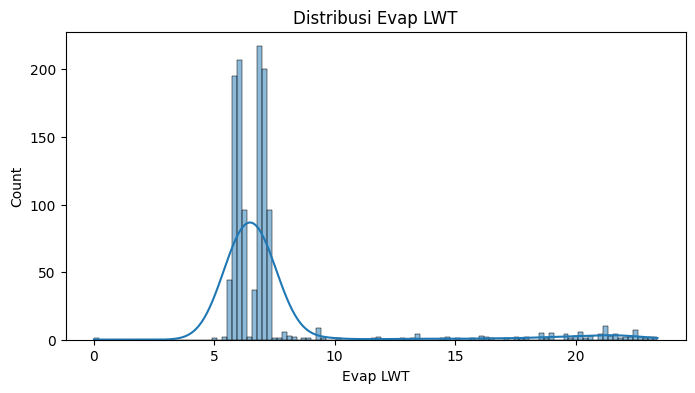

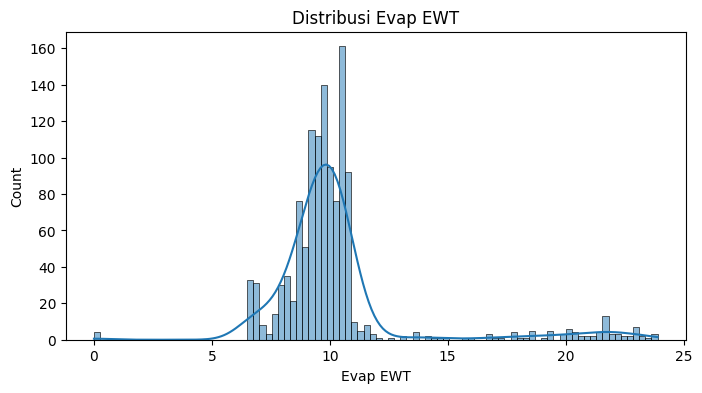

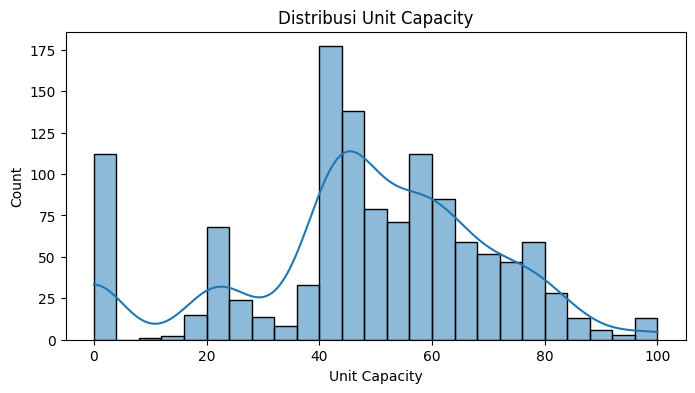

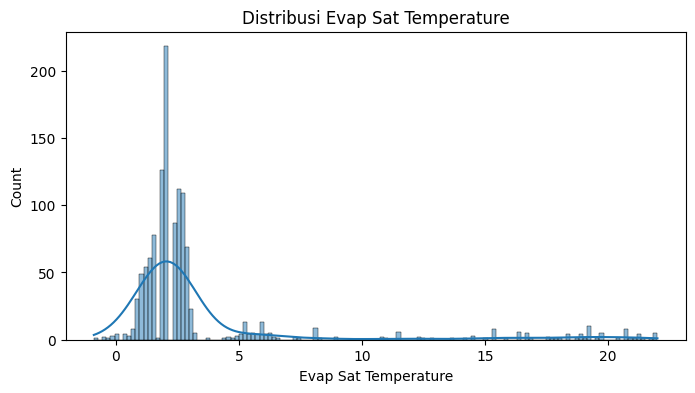

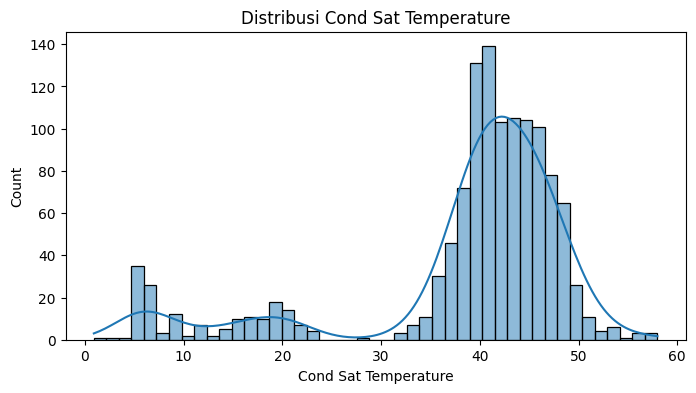

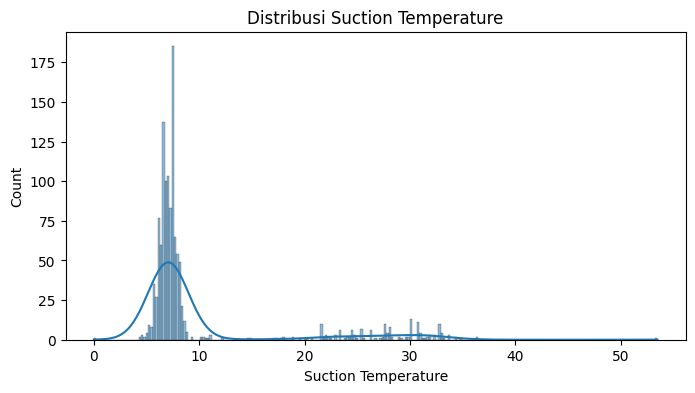

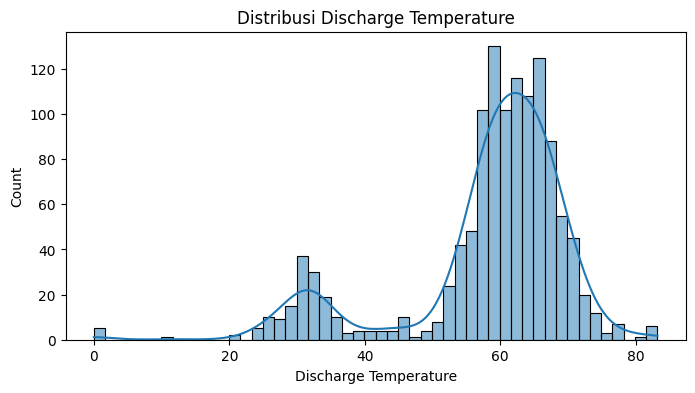

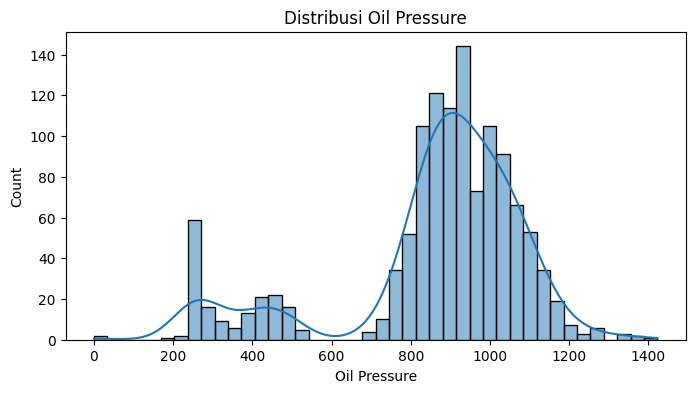

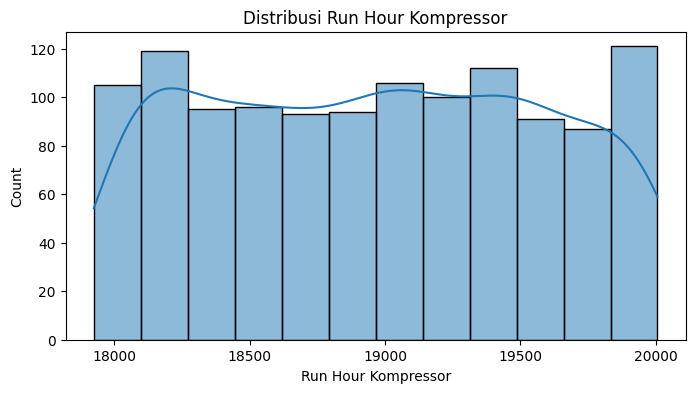

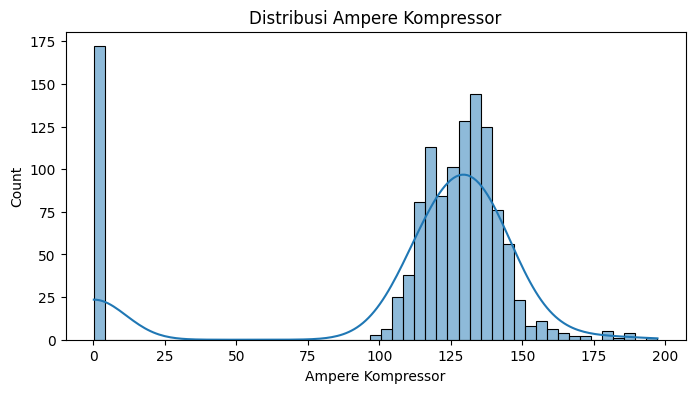

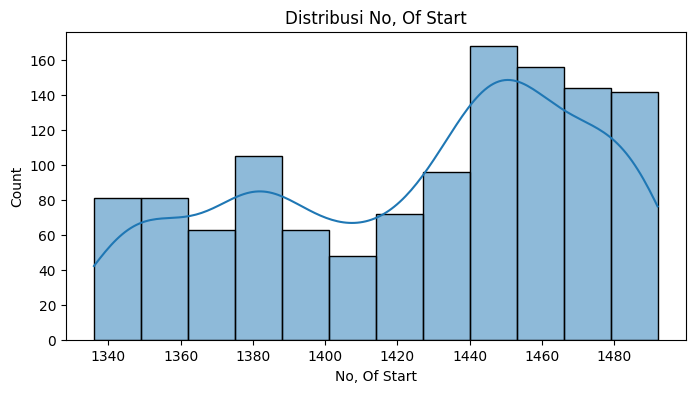

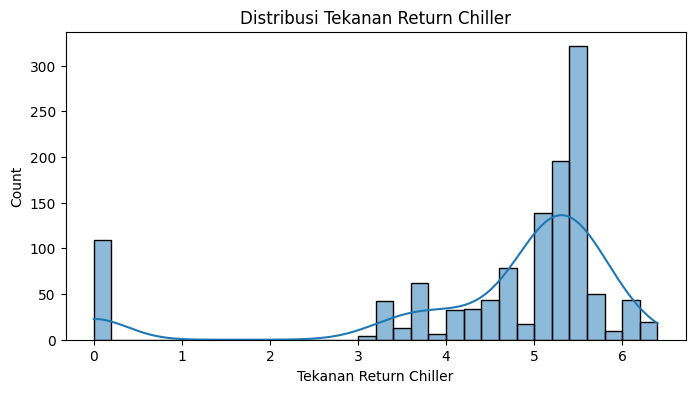

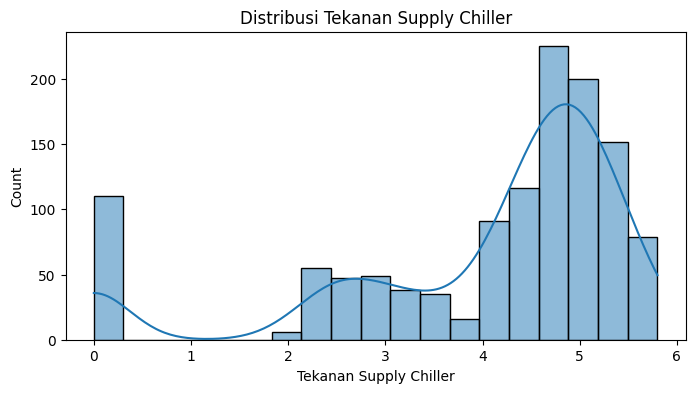

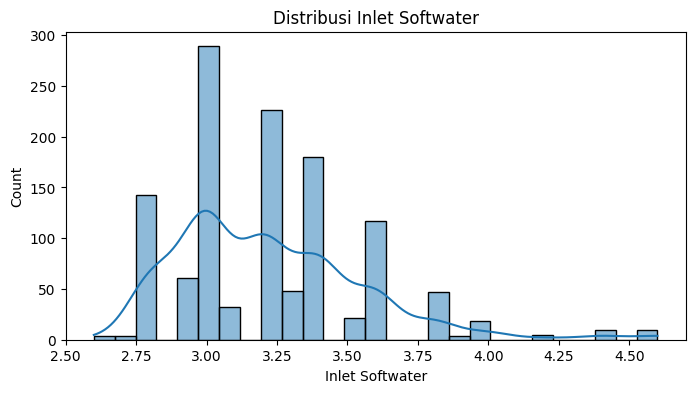

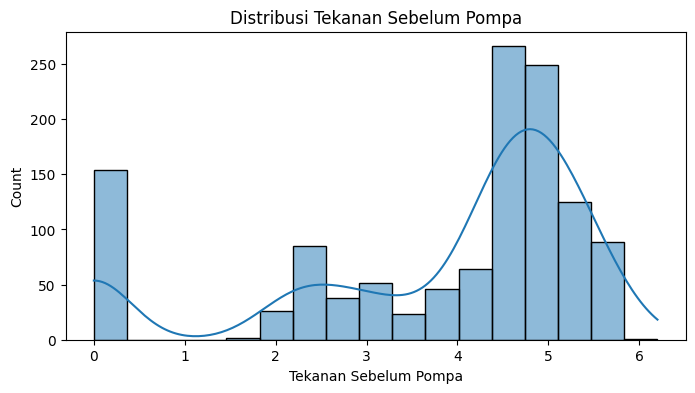

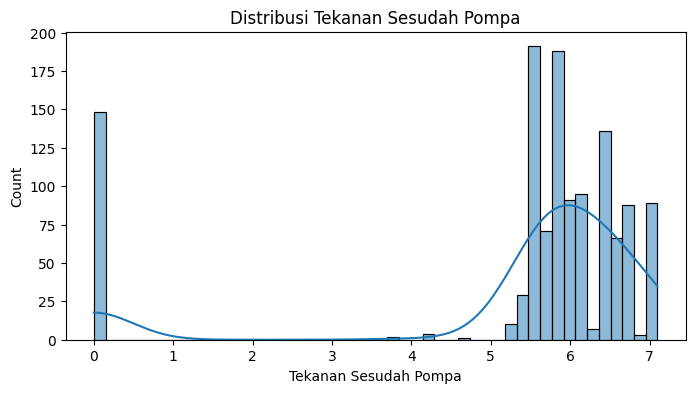

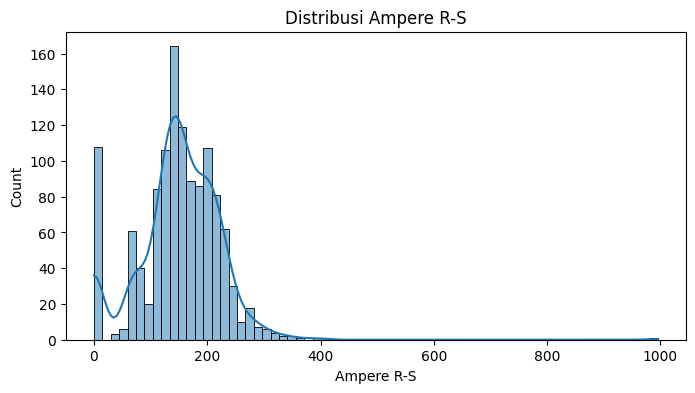

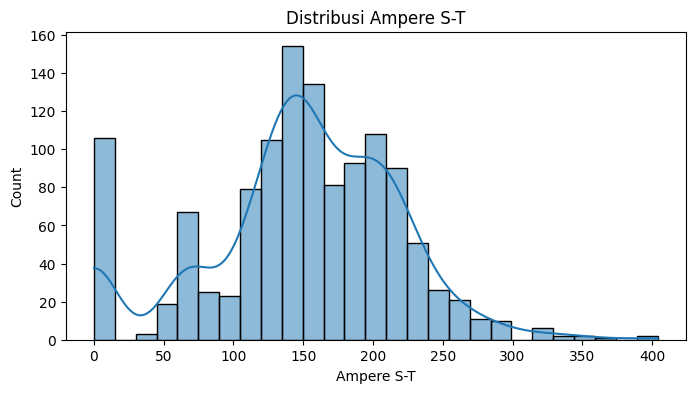

In [3]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur tampilan matplotlib
%matplotlib inline

# Menampilkan informasi dasar tentang dataset
print("Informasi Dataset:")
print(df.info())

# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Memeriksa missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualisasi distribusi variabel numerik
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.show()

## 3. Feature Selection

Feature selection adalah proses memilih fitur yang paling relevan untuk digunakan dalam model Machine Learning.

Penggunaan model machine learning seperti XGBoost dalam konteks manufaktur, khususnya pada dataset Chiller, adalah contoh bagus dari aplikasi teknologi canggih dalam industri. Berikut adalah contoh use case atau kasus penggunaan yang bisa Anda kembangkan:

Use Case: Prediksi Ampere Kompressor dalam Sistem Chiller
1. **Latar Belakang dan Kebutuhan:**
* Industri: Manufaktur (khususnya yang menggunakan sistem pendinginan).
* Masalah: Fluktuasi ampere kompressor dapat menandakan masalah efisiensi atau kerusakan potensial dalam sistem chiller.
* Kebutuhan: Mendeteksi perubahan atau anomali dalam ampere kompressor untuk pencegahan kerusakan dan peningkatan efisiensi energi.

2. **Pengumpulan dan Persiapan Data:**
* Cond Sat Temperature: Suhu jenuh kondensor.
* Oil Pressure: Tekanan oli dalam sistem.
* Suction Temperature: Suhu hisap.
* Discharge Temperature: Suhu buang.
* Ampere Compressor: Target prediksi (variabel dependen).

**Target: Ampere Kompressor**

**Ampere Kompressor** mengukur arus listrik yang dikonsumsi oleh kompressor. Dalam konteks chiller, ini adalah indikator penting dari konsumsi energi. Mengoptimalkan konsumsi energi kompressor tidak hanya menghemat biaya tetapi juga dapat meningkatkan umur peralatan dan efisiensi operasional.

**Fitur dan Pengaruhnya**
1. **Cond Sat Temperature (Suhu Jenuh Kondensator)**
  * Pengaruh: Suhu jenuh kondensator yang lebih tinggi dapat menunjukkan bahwa kondensator harus mengeluarkan lebih banyak panas, yang mengakibatkan kompressor bekerja lebih keras. Ini sering terkait dengan kondisi lingkungan atau beban pendinginan yang tinggi.
  * Analisis: Menganalisis korelasi antara suhu jenuh kondensator dan ampere kompressor akan membantu memahami seberapa efisien kondensator bekerja dan bagaimana hal ini mempengaruhi konsumsi energi kompressor.
2. **Discharge Temperature (Suhu Pembuangan)**
  * Pengaruh: Suhu pembuangan tinggi biasanya mengindikasikan bahwa kompressor bekerja lebih keras, yang meningkatkan konsumsi energi. Hal ini bisa disebabkan oleh berbagai faktor, termasuk beban termal tinggi, kondisi operasional yang tidak optimal, atau isu pemeliharaan.
  * Analisis: Dengan menganalisis hubungan antara suhu pembuangan dan ampere kompressor, kita dapat mengidentifikasi kondisi di mana efisiensi energi berkurang.

3. **Oil Pressure (Tekanan Oli)**
  * Pengaruh: Tekanan oli yang tidak optimal bisa menyebabkan peningkatan gesekan dan keausan pada kompresor, yang mempengaruhi efisiensi dan konsumsi energinya. Tekanan yang terlalu rendah atau terlalu tinggi sama-sama merugikan.
  * Analisis: Melalui regresi linear, kita dapat menilai seberapa signifikan pengaruh tekanan oli terhadap konsumsi energi kompressor dan menentukan nilai tekanan oli optimal untuk efisiensi maksimal.
  
Dalam konteks pabrik, pemahaman ini sangat berguna untuk mengidentifikasi area di mana efisiensi dapat ditingkatkan, baik melalui pengaturan operasional, pemeliharaan rutin, atau upgrade peralatan. Dengan menerapkan model regresi linear, Anda dapat mengquantifikasi hubungan ini dan menggunakan wawasan tersebut untuk membuat keputusan yang lebih tepat dan efektif dalam mengelola sistem chiller.

**ChatGPT Prompt:**

Berikan code untuk membagi dataset menjadi data training dan testing untuk machine learning. Atur kolom "Cond Sat Temperature", "Oil Pressure", "Suction Temperature", dan "Discharge Temperature" menjadi fitur. Atur kolom "Ampere Kompressor" menjadi target


## 4. Training Machine Learning

Untuk melatih model regresi linier menggunakan dataset yang Anda miliki dan kemudian mengevaluasi model tersebut, Anda dapat menggunakan library scikit-learn di Python. Langkah-langkahnya termasuk melatih model dengan data training (X_train dan y_train) dan kemudian mengevaluasi kinerjanya dengan data testing (X_test dan y_test).

**ChatGPT Prompt:**

Berikan code untuk melakukan training machine learning dengan menggunakan SVM pada data training, kemudian evaluasi hasil model dengan data testing menggunakan MSE, RMSE, MAE, dan R^2

## 6. Actual vs Predicted

**ChatGPT Prompt:**

Berikan code untuk menampilkan beberapa baris pertama dari DataFrame yang membandingkan nilai sebenarnya dan prediksi